**Assignment 3**

**Question 1:**

Give brief definitions for the following:

```
i. Dijkstra's Algorithm
ii. Bipartite Graph
iii. Hamiltonian Cycle
iv. Adjacency Matrix
v. Kruskal's Algorithm
vi. Directed Acyclic Graph (DAG)
```



**Solution 1:**

i. Dijkstra's Algorithm
An algorithm used to find the shortest path from a specified starting node to all other nodes in a weighted graph. It assumes all weights are non-negative.

ii. Bipartite Graph
A graph where the set of vertices can be divided into two disjoint sets such that no two vertices within the same set are adjacent.

iii. Hamiltonian Cycle
A cycle in an undirected or directed graph that visits each vertex exactly once and returns to the starting vertex.

iv. Adjacency Matrix
A square matrix used to represent a finite graph. The element at row i and column j represents the edge between vertices i and j. The value is 0 if there's no edge, and typically 1 (or the weight) if there's an edge.

v. Kruskal's Algorithm
An algorithm to find the minimum spanning tree of a connected, undirected graph with weighted edges. It works by sorting all the edges from the least to the most expensive, and then picking edges one by one, ensuring that the edge chosen doesn't form a cycle.

vi. Directed Acyclic Graph (DAG)
A directed graph with no directed cycles. That is, it consists of vertices and edges, with each edge directed from one vertex to another, such that there is no way to start at any vertex v and follow a sequence of edges that eventually loops back to v again.

**Question 2:**

Use the Bellman-Ford algorithm to find the shortest path from node G to L in the weighted directed graph described above. Show your work.

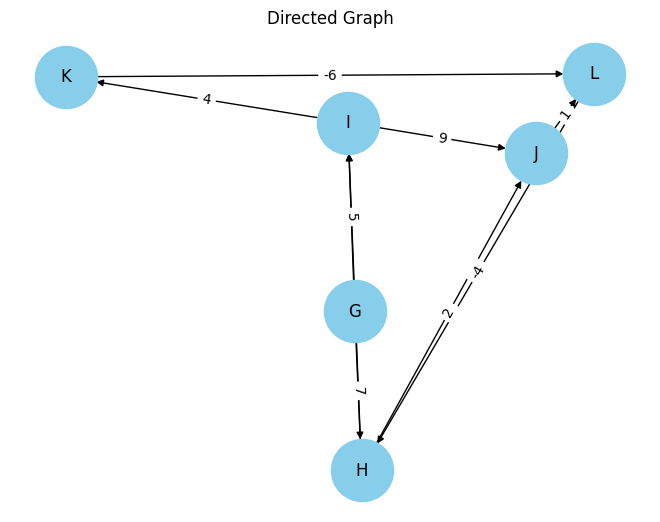

**Solution 2:**

PseudoCode

```
function BellmanFord(list vertices, list edges, vertex source):
  ::distance[],predecessor[]
  
  // Step 1: initialize graph
  for each vertex v in vertices:
    if v is source then distance[v] := 0
    else distance[v] := inf
    predecessor[v] := null

  // Step 2: relax edges repeatedly
  for i from 1 to size(vertices)-1:
    for each edge (u, v) in Graph with weight w in edges:
      if distance[u] + w < distance[v]:
        distance[v] := distance[u] + w
        predecessor[v] := u

  // Step 3: check for negative-weight cycles
  for each edge (u, v) in Graph with weight w in edges:
    if distance[u] + w < distance[v]:
      error "Graph contains a negative-weight cycle"
  
  return distance[], predecessor[]

```



Calculating G-L

Iteration	G	H	I	J	K	L	Remarks
0	0	INF	INF	INF	INF	INF	Initialization
1	0	7(G)	5(G)	INF	INF	INF
2	0	4(L)	2(H)	11(G)	9(I)	INF
3	0	-3(I)	2(H)	9(I)	9(I)	10(J)
4	0	-3(I)	-1(L)	5(H)	3(I)	4(J)
5	0	-7(L)	-1(L)	5(H)	3(I)	4(J)
6	0	-7(L)	-1(L)	5(H)	3(I)	-2(K)****	Negative cycle detected!


**** negative cycle
Shortest path - negative cycle detected, so the shortest path is not reliable due to the negative cycle in the graph.

Calculating L-G

Iteration	L	J	I	H	G	Remarks
0	0	INF	INF	INF	INF	Initialization
1	0	1(L)	5(G)	7(G)	INF
2	-4(H)	-3(H)	4(G)	3(G)	INF
3	-4(H)	-3(H)	4(G)	3(G)	INF
4	-4(H)****	-3(H)	4(G)	3(G)	INF	Stop due to negative cycle
**** negative cycle detected
Shortest path - negative cycle detected, indicating no reliable shortest path from L to G.

**Question 3:**

Given the directed graph shown:

Determine the maximum flow from node A to node F using the Ford-Fulkerson method.

Instructions:

Identify augmenting paths.
Update the flow and capacities based on the identified paths.
Ensure that the flow does not exceed the capacity for any edge.
Continue this process until no further augmenting paths can be found.
Your answer should list the augmenting paths chosen and the flow through each path, leading to the determination of the maximum flow from node A to node F.

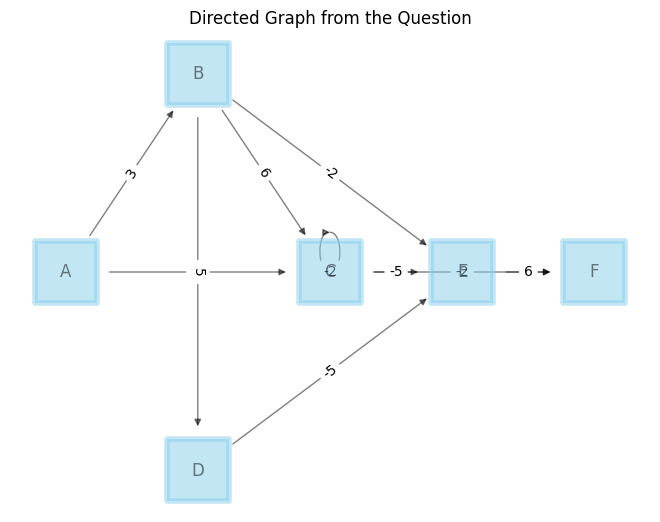

**Solution 3:**

To determine the maximum flow from node A to node F using the Ford-Fulkerson algorithm, we'll need to identify augmenting paths and calculate the flow through each of them until we can't find any more augmenting paths.

Given the directed graph, here's the solution:

AP stands for Augmenting Path

AP1: (A-C: 0-6) -> (C-F: 0-6) Flow 6
AP2: (A-B: 0-3) -> (B-C: 0-2) -> (C-E: 0-5) -> (E-F: 0-6) Flow 2
AP3: (A-D: 0-5) -> (D-E: 0-5) -> (E-F: 2-6) Flow 3
No more augmenting paths. Max-Flow 11

Pseudo Code:

```
Procedure Ford-Fulkerson(G, source, sink):
    Initialize flow in all edges to 0
    max_flow = 0
    
    while there exists an augmenting path P from source to sink:
        path_flow = ∞
        
        for each edge (u, v) in P:
            path_flow = minimum(path_flow, capacity(u, v) - flow(u, v))
        
        for each edge (u, v) in P:
            flow(u, v) = flow(u, v) + path_flow
            flow(v, u) = flow(v, u) - path_flow
        
        max_flow = max_flow + path_flow
    
    return max_flow

Procedure BFS(G, source, sink, parent):
    Initialize all nodes as unvisited
    Queue Q
    Q.enqueue(source)
    visited[source] = true

    while Q is not empty:
        u = Q.dequeue()
        for each neighbor v of u:
            if not visited[v] and capacity(u, v) - flow(u, v) > 0:
                Q.enqueue(v)
                visited[v] = true
                parent[v] = u

    return visited[sink]


```



Question 4:

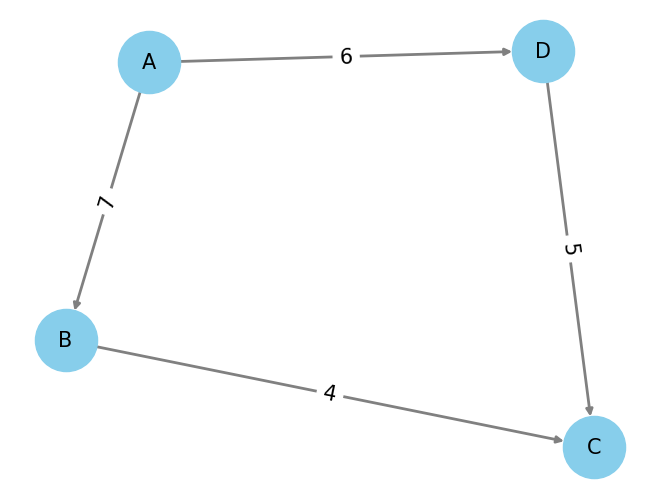

Use the Preflow-Push (Push–relabel) maximum flow algorithm to find the maximum flow from node A to C in the weighted directed graph above. Show your work.

**Solution 4:**

Set all node heights to zero, except for A, which should be |V|.
f(e) = ce for all e = (s, v) and f(e) = 0 for all other edges.
Now push and relabel while there are nodes with excess ef(v) > 0, other than the source or sink.
Initialize:
Set all node heights to zero, except for A=4.
A: Relabel -> {A, h = 4}
A-B: Push -> {A-B, f(e(A-B)) = 7, ef(B) = 7}
A-D: Push -> {A-D, f(e(A-D)) = 6, ef(D) = 6}

End initialize

B: Relabel -> {B, h = 1}
ef(B) = 7
B-C: Push -> {B-C, f(e(B-C)) = 4, ef(B) = 3, ef(C) = 4}

D: Relabel -> {D, h = 1}
ef(D) = 6
D-C: Push -> {D-C, f(e(D-C)) = 5, ef(D) = 1, ef(C) = 9}

D: Relabel -> {D, h = 2}
ef(D) = 1
D-B: Push -> {D-B, f(e(D-B)) = 1, ef(D) = 0, ef(B) = 4}

B: Relabel -> {B, h = 2}
ef(B) = 4
B-A: Push -> {B-A, f(e(B-A)) = 4, ef(A) = 4, ef(B) = 0}

No remaining excess, algorithm terminates.
ef(C) = 9 therefore the flow to C (the max-flow) is 9.

Pseudo Code:



```
Preflow-Push(G, s, t):
1. Initialize all nodes' heights and excess flows to 0.
2. Set the source node's height to |V|.
3. For each edge (s, v) do:
    1. Set f(s, v) to capacity(s, v).
    2. Set f(v, s) to -capacity(s, v).
    3. Increase excess flow for v by capacity(s, v).

4. While there exists an overflowing vertex v ≠ s, t:
    1. If there's an adjacent node u such that height(u) < height(v):
        1. Push excess flow from v to u.
    2. Else:
        1. Increase the height of v.

5. Return flow.

Push(u, v):
1. Let flow = min(excess(u), capacity(u, v) - flow(u, v))
2. Decrease excess flow for u by flow.
3. Increase excess flow for v by flow.
4. Increase flow(u, v) by flow.
5. Decrease flow(v, u) by flow.

Relabel(u):
1. Increase height(u) by 1.
```



**Question 5:**

Consider a flow network with a directed graph G=(V,E) where each edge has a capacity of 2. There's a source vertex s and a sink vertex t. Given an integer parameter p such that p≤|E|, your objective is to reduce the flow in the network from s to t by decreasing the capacity of p edges to 1 (essentially halving their capacity). You need to find a subset of edges N from E with a size of p (i.e., |N|=p and N is a subset of E) so that the flow from s to t in the new graph G'=(V,E-N) plus the reduced capacities is as low as possible. The challenge is to design a polynomial-time algorithm to accomplish this.




**Solution 5:**

If the minimum s-t cut has a size less than or equal to 2p in the original graph G, then we can reduce the flow to a value equal to the minimum s-t cut minus p. Otherwise, let g be a value greater than 2p that represents the minimum s-t flow.

Firstly, identify the minimum s-t cut (A, B) in G. Then, reduce the capacity of p edges going out of A by half. The resulting sub-graph G' has a max flow value reduced by p compared to G.

However, we claim that for any set of edges F of size p, the sub-graph G'=(V,E-F) with reduced capacities will have an s-t flow value of at least g-p. This is because, for any cut (A, B) of G', there will be at least g edges going out of A in G. With at most p having their capacities reduced, there will still be a flow of at least g-p in G'.

Pseduo Code:
The solution can be visualized using the Ford-Fulkerson algorithm to find the max flow. Here is a pseudo-code that modifies the capacity:




```
Algorithm: Reduce Network Flow
Input: Graph G, Source node s, Sink node t, Integer p (number of edges to reduce)
Output: Modified Graph G with reduced flow

Procedure ReduceNetworkFlow(G, s, t, p)
    1. (residualGraph, maxFlow) <- FordFulkerson(G, s, t)
        1.1. Compute the maximum flow in the graph G
        1.2. Create a residual graph
    
    2. minCutSet <- FindMinCut(residualGraph, s)
        2.1. Use depth-first search (DFS) from source 's' in the residual graph
        2.2. All reachable vertices form set A, and all non-reachable vertices form set B
        2.3. Edges from vertices in A to vertices in B are the min-cut edges
    
    3. edgesOutOfA <- IdentifyEdges(minCutSet, G)
        3.1. For each vertex u in A, check for all vertices v in B
        3.2. If there's an edge from u to v in the original graph G, store this edge
    
    4. numberOfEdgesToReduce <- Min(p, SizeOf(edgesOutOfA))
    
    5. For i = 1 to numberOfEdgesToReduce
        5.1. selectedEdge <- edgesOutOfA[i]
        5.2. Reduce the capacity of selectedEdge in G by 1

    // Optional step: If you need to calculate the new flow in the modified graph
    6. newMaxFlow <- FordFulkerson(G, s, t)
        6.1. Compute the maximum flow in the modified graph G

    7. Return G (and optionally newMaxFlow)

EndProcedure

```



**Question 6:**

During a significant wildfire, firefighters have identified a set of m people who need immediate evacuation. There are l evacuation centers available. Each of the m individuals must reach an evacuation center within 45 minutes, based on their current locations.

It's also crucial to ensure that no evacuation center is overcrowded. Using radios, rescue teams aim to determine if they can allocate each person to an evacuation center such that no center shelters more than (m/l) people.

The challenge is to devise a polynomial-time algorithm that uses the stranded people's location data and determines if an equitable distribution to the evacuation centers is possible.


**Solution 6:**

Objective:
Determine whether an equitable distribution of stranded individuals to the available evacuation centers is feasible.

Terminology:

peopleList: A list containing all stranded individuals and their respective locations.
centersList: A list of all available evacuation centers and their respective locations.
maxCapacity: The maximum number of individuals an evacuation center can accommodate without being overly crowded.
Algorithm Explanation:

Initialize Data Structures:

numOfPeople and numOfCenters help us determine how many people are stranded and how many centers are available.
centerAllocations is a dictionary (or associative array) where each key is an evacuation center's ID and its value represents the number of people currently assigned to it.
Find Possible Centers for Each Person:

For every person in peopleList, we want to determine which evacuation centers they can reach within 45 minutes.
This is done with the findPossibleCentersForPerson function. It checks the distance between a person's location and every center's location. If the distance represents a travel time of 45 minutes or less, that center is a valid choice for that person. This list of possible centers is then stored for each person.
Assign People to Centers:

We iterate over each person in peopleList and try to assign them to one of their possible centers.
If a center's current allocation is less than the maxCapacity, a person is assigned to that center, and the center's count in centerAllocations is incremented.
If a person cannot be assigned to any of their possible centers (because all are full), the distribution is not feasible, and the function returns False.
Check for Equitable Distribution:

After attempting to assign all people, we need to verify that no center has been allocated more people than its maxCapacity.
We iterate over all centers in centerAllocations and if any center has more than maxCapacity people assigned, the function returns False.
Decision:

If the algorithm hasn't returned False by this point, it means that an equitable distribution is achievable, so it returns True.
Conclusion:
By the end of the algorithm, if True is returned, it means every person has been allocated to a center within 45 minutes of their location, and no center is overcrowded. If False is returned, either some people couldn't be assigned to any center, or one or more centers were allocated too many people.

Pseudo Code:



```
function equitableEvacuation(peopleList, centersList, maxCapacity):
    // Step 1: Collect Data
    numOfPeople = length(peopleList)
    numOfCenters = length(centersList)

    // Step 2: Map Locations - This function should return a list of centers within 45 minutes for each person
    function findPossibleCentersForPerson(person):
        possibleCenters = []
        for center in centersList:
            if distanceBetween(person.location, center.location) <= 45:  // Assuming distanceBetween gives minutes
                append possibleCenters with center
        return possibleCenters

    // Step 3: Possible Centers
    for person in peopleList:
        person.possibleCenters = findPossibleCentersForPerson(person)

    // Step 4: Count and Assign
    centerAllocations = {}  // Dictionary to keep track of how many people are allocated to each center
    for center in centersList:
        centerAllocations[center.id] = 0  // Initialize with zero people

    for person in peopleList:
        assigned = False
        for center in person.possibleCenters:
            if centerAllocations[center.id] < maxCapacity:
                centerAllocations[center.id] += 1
                assigned = True
                break
        if not assigned:
            return False  // If we can't assign a person to any center

    // Step 5: Equitable Distribution Check
    for centerID, count in centerAllocations:
        if count > maxCapacity:
            return False

    // Step 6: Decision
    return True

peopleList = [...]  // List of stranded people and their locations
centersList = [...]  // List of evacuation centers and their locations
maxCapacity = ceil(numOfPeople / numOfCenters)  // Using a ceil function to get the maximum allowable people per center

result = equitableEvacuation(peopleList, centersList, maxCapacity)
if result:
    print("Equitable distribution is achievable")
else:
    print("Equitable distribution is not achievable")

```



Question 7:

You are an executive for the renowned coffee chain, BeanBrew. Your task is to strategize the brand's expansion across Sunset Boulevard. There's a potential spot on each block, for M blocks, all linearly arranged. For location j, if you establish a coffee shop at that place, you will earn a profit of pj > 0. The management has given you the liberty to decide on the number of outlets, but two outlets cannot be on neighboring blocks.

Solution 7:

1.1 Define the Sub Problems:

To address this challenge, we'll break it down using the first M blocks, allowing for an iterative solution based on profits from earlier blocks.

Sub-problem:

Consider BEST(j) as the highest possible profit when only looking at opening outlets on blocks 1 through j.

Explanation:

This sub-problem approach is effective because:

Overlapping Sub-problems: When deciding on opening an outlet on block j, profits from prior blocks are crucial. Specifically, the decision for block j is influenced by the profit from block j-1 and block j-2 due to the constraint that shops can't be neighbors. By setting our sub-problems this way, we can evaluate all combinations from earlier blocks to decide optimally for block j.

Optimal Substructure: Segmenting our main issue into smaller, similar sub-problems lets us address each individually and use their results to tackle bigger sub-problems. This is vital for dynamic programming solutions, letting us build our answer (for all M blocks) step-by-step.

So, BEST(j) provides both overlapping sub-problems and optimal substructure, making it suitable for this challenge.


1.2 Recurrence Relation:

The recurrence for BEST(j) is:
BEST(j) = max(BEST(j-1), pj + BEST(j-2))

Explanation:

For any block j, there are two main choices:

1. Skip setting up a shop on block j, thus profit remains as BEST(j-1).
2. Set up a shop on block j, earning profit pj. Due to constraints, the last possible shop would be on block j-2, making the profit pj + BEST(j-2).

To get the most profit, we pick the higher of these two options, indicated by the max function.

1.3 Prove Your Recurrence is Correct:

Let's prove the accuracy of this recurrence using an intuitive argument:

For each block j, we're attempting to decide whether to open a coffee shop there.

Case where we don't open on block j: This is the case where the optimal solution for blocks 1 through j is the same as the optimal solution for blocks 1 through j-1. This is encapsulated by BEST(j - 1).

Case where we open on block j: Now, given the constraint that no two neighboring blocks can both have outlets, if we open an outlet on block j, block j-1 cannot have an outlet. Thus, our problem reduces to finding the optimal solution for blocks 1 through j-2 and then adding the profit from block j. This gives us pj + BEST(j - 2).

Our aim is to maximize profit. Therefore, at each step/block j, we should choose the option that yields the higher profit. This is captured by taking the maximum of the two cases mentioned above.

Thus, given our two possible scenarios for each block and the need to maximize profit, the recurrence relation BEST(j) = max(BEST(j - 1), pj + BEST(j - 2)) correctly encapsulates our strategy for this problem.

1.4 State and Prove Base Cases (Continuation):

To further prove the correctness of our base cases:

Case 1: BEST(0) = 0:

If there are zero blocks, then there's no location to establish an outlet. Hence, no profit can be derived from zero blocks. This is intuitive.

Case 2: BEST(1) = p1:

With just one block available, there's only one potential location for the outlet. The profit in this situation is the profit of setting up the shop at this lone block. There's no other location to consider or constraints to abide by (like the non-neighboring rule). Therefore, the optimal profit for one block is the profit obtainable from that single block, which is p1.

Given these base cases and the previously explained recurrence relation, we can optimally decide on the locations to set up the coffee shops while maximizing the profit and adhering to the given constraints.

**Question 8:**

For each provided recurrence, determine the runtime T(n) using the Master Theorem. If the Master Theorem doesn't apply, mention that.

i. T(n) = 3T(n/2) + n^2
ii. T(n) = T(n/3) + n^1.5
iii. T(n) = 5T(n/3) + n*log(n)
iv. T(n) = 7T(n/2) - n^1.5
v. T(n) = n^(log(n)) * T(n/2) + n^2


**Solution 8:**

i. T(n) = 3T(n/2) + n^2
Case 2: T(n) = Θ(n^(log_b(a)) * log^p(n))
Where, a=3, b=2, k=2, f(n)=n^2
This is Case 2 with p=0.
Result: T(n) = Θ(n^(log_2(3)) * logn)

ii. T(n) = T(n/3) + n^1.5
Case 3: T(n) = Θ(f(n))
Where, a=1, b=3, k=1.5, f(n)=n^1.5
This is Case 3.
Result: T(n) = Θ(n^1.5)

iii. T(n) = 5T(n/3) + n*log(n)
Case 1: T(n) = Θ(n^(log_b(a)))
Where, a=5, b=3, k=1, f(n)=n*log(n)
This is Case 1 with n^(log_b(a)) > f(n) for a sufficiently large n.
Result: T(n) = Θ(n^(log_3(5)))

iv. T(n) = 7T(n/2) - n^1.5
Master Theorem doesn't apply: f(n) is negative.

v. T(n) = n^log(n) * T(n/2) + n^2
Master Theorem doesn't apply: Non-polynomial difference between f(n) and n^k.


**Question 9:**

Given the six intervals below, and their associated values; select a subset of non-overlapping intervals with the maximum combined value. Use dynamic programming.

Interval | Value
--------|------
F       |  4
G       |  3
H       |  6
I       |  2
J       |  5
K       |  3


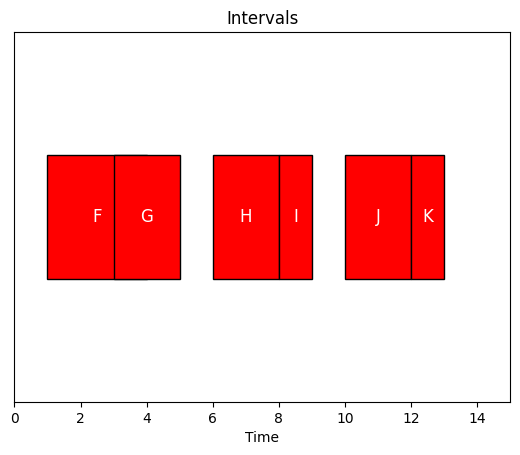

**Solution 9:**


```
Interval | Value | Previous | Max
---------|-------|----------|----
F       |   4   |   n/a    |  4
G       |   3   |   n/a    |  4 (Max(4, 0) = 4)
H       |   6   |   n/a    |  6 (Max(6, 0) = 6)
I       |   2   |    H     |  8 (Max(6, 6+2) = 8)
J       |   5   |    F     |  9 (Max(8, 4+5) = 9)
K       |   3   |    I     |  9 (Max(9, 8+3) = 9)

Trace:
Interval | Trace(i)    | S
---------|-------------|----
K       | jump to I   | {}
J       | 5 + 4 = 9   | {J}
I       | 2 + 6 = 8   | {J, I}
H       | 6 = 6       | {J, I, H}
G       | jump to H   |
F       | 4 = 4       |

S = {H, I, J}

```



Pseudo Code:



```
1. Initialize an array M with size equal to the number of intervals. This will store the maximum values.
2. For each interval i from 1 to n:
    2.1. Set M[i] = value of interval i
    2.2. For each interval j < i:
        2.2.1. If interval j does not overlap with interval i:
            2.2.2. Set M[i] = max(M[i], M[j] + value of interval i)
3. Return M[n] which contains the maximum value for the subset of non-overlapping intervals
4. To reconstruct the solution, backtrack through the M array, checking which intervals were included in the optimal solution.

Algorithm FindOptimalIntervals(intervals):
    n = number of intervals
    sort intervals based on end times
    Initialize M[0...n] = 0
    for i = 1 to n:
        M[i] = value of interval i
        for j = 1 to i-1:
            if end time of j < start time of i:
                M[i] = max(M[i], M[j] + value of interval i)
    return M[n]

Algorithm ReconstructSolution(M, intervals):
    Initialize solution as empty set
    i = n
    while i > 0:
        if M[i] is not equal to M[i-1]:
            add interval i to solution
            skip to the interval that does not overlap with i
        else:
            i = i - 1
    return solution

```



**Question 10:**

Given the weights and values of six items in the table below, select a subset of items with the maximum combined value that will fit in a knapsack with a weight limit, W, of 10. Use dynamic programming. Show your work.



```
Item i	Value v	Weight w
1	        4	       2
2	        5	       3
3	        3	       1
4	        6	       4
5	        7	       5
6	        2	       2

```

**Solution 10:**

Given:

Weights: w=[2,3,1,4,5,2]
Values: v=[4,5,3,6,7,2]
Capacity: W=10

Using the dynamic programming approach:

We initialize an array  OPT of size n×W (where n is the number of items), and fill it up based on the recurrence relation.

Let's fill the table:



```
            1   2   3   4   5   6
10   0   4   9  12  18  23  25
9    0   4   9  12  17  22  24
8    0   4   9  11  16  21  23
7    0   4   9  11  15  20  22
6    0   4   8  10  14  19  21
5    0   4   8  10  13  18  20
4    0   4   7   9  12  16  18
3    0   4   7   9  11  14  16
2    0   4   5   8  10  13  15
1    0   4   4   7   7   7   9

```
To determine the items in the knapsack, start from the bottom-right corner of the table (at OPT[6,10] = 25) and backtrack:

- OPT[6,10] equals OPT[5,10], so item 6 is not in the knapsack.
- OPT[5,10] equals OPT[4,8] + v[5], meaning item 5 is in the knapsack.
- Moving to OPT[4,3], it equals OPT[3,3]. Therefore, item 4 is not in the knapsack.
- OPT[3,3] is the sum of OPT[2,2] and v[3], so item 3 is in the knapsack.
- Moving to OPT[2,1], it equals OPT[1,1], indicating item 2 is not in the knapsack.
- OPT[1,1] equals v[1], so item 1 is in the knapsack.

In conclusion, the items in the knapsack are 1, 3, and 5, with a combined value of 25.
Items selected: S = [1, 3, 5]

**How ChatGPT or the tool you used assisted in this task:**

My utilization of ChatGPT throughout the learning process was indispensable. This tool acted as a constant companion, simplifying intricate concepts and offering clarifications whenever doubts arose. Whether I was grappling with the complexities of the Ford-Fulkerson algorithm or trying to piece together the nuances of dynamic programming, ChatGPT was there, making every step feel less daunting. Its ability to elucidate, especially with regards to topics like the Master Theorem, was akin to having a personal tutor. The interactive nature of ChatGPT facilitated a deeper engagement with the material, allowing for a more genuine and comprehensive understanding of each algorithm.

**Challenges you faced while ensuring the problem maintained the spirit of the example:**

While delving into algorithms such as bellman-ford and Preflow-Push, I realized the importance of maintaining the authenticity and spirit of the original problem. One significant challenge was to not oversimplify or modify the problem to such an extent that it lost its inherent complexity or relevance. Ensuring the right balance between comprehensibility and retaining the core essence was tricky. Another challenge was steering clear of generic or overly complex solutions, which might detract from the learning experience. It was a continuous endeavor to strike the right balance between adaptability and fidelity to the foundational principles of each algorithm.

**What you learned about problem design in the realm of algorithms:**

The realm of algorithms is vast and varied, and delving deep into it has offered numerous insights about problem design. I learned that a well-designed problem should be both challenging and enlightening, pushing one to think critically while also offering a path to a deeper understanding. The knapsack problem, for instance, showed how problem decomposition and optimization can be beautifully intertwined. Dynamic programming underscored the essence of building solutions progressively, one step at a time. Through the lens of the polynomial-time algorithm, I grasped the significance of efficiency in problem-solving. Each algorithm taught me that at the heart of problem design lies the dual goal of fostering learning and challenging one's existing knowledge boundaries.